# Minimal DDIM (CIFAR-10) with Adam

In [1]:
# Imports
from pathlib import Path
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, utils
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

# Import implementation
from implementations.edm_style_preconditioning import (
    UNet, EDMPrecond, edm_sample_loop, edm_train_ddim)

# import numpy as np
# import random
# seed = 0
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)

# # Deterministic operations (Optional but recommended for exact reproducibility)
# # Note: This might make training slower. If speed is priority, keep benchmark=True
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

print('torch:', torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device ->', device)

torch: 2.9.0+cu126
device -> cuda
torch: 2.9.0+cu126
device -> cuda


In [2]:
# CIFAR-10 data loaders
def get_dataloaders(batch_size=128, img_size=32, num_workers=4):
    transform = transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),  # map to [-1,1]
    ])
    train_ds = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    test_ds = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
    return train_loader, test_loader

train_loader, test_loader = get_dataloaders(batch_size=128, img_size=32, num_workers=2)

In [3]:
# Helper to show saved sample grid
from PIL import Image
def show_image(path, figsize=(6,6)):
    img = Image.open(path)
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
# WARNING: Training DDIM on CIFAR-10 is moderately heavy. Reduce epochs or timesteps for quick tests.
timesteps = 1000  # use 1000 for standard DDIM training; reduce for inference
model = UNet(in_ch=3, base_ch=64, time_emb_dim=64)
print(f'Model parameters: {sum(p.numel() for p in model.parameters())/1e6:.2f}M')

edm_train_ddim(
    model, train_loader, device,
    epochs=100,
    lr=2e-4,
    save_dir='./runs_ddim_test_edm_preconditioning'
)

Model parameters: 8.22M
Compiling model...


Epoch 1/100: 100%|██████████| 391/391 [01:45<00:00,  3.72it/s, loss=0.3038, lr=0.00020]


End epoch 1, avg loss 0.3756


/home/arthurdls/anaconda3/envs/eos-diffusion/lib/python3.12/site-packages/torch/backends/cuda/__init__.py:131: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  return torch._C._get_cublas_allow_tf32()
/home/arthurdls/anaconda3/envs/eos-diffusion/lib/python3.12/site-packages/torch/_inductor/compile_fx.py:312: UserWarning: TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_precision('high')` for better performance.
  warnings.war

Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_1.png


Epoch 2/100: 100%|██████████| 391/391 [00:28<00:00, 13.74it/s, loss=0.2563, lr=0.00020]


End epoch 2, avg loss 0.2735
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_2.png


Epoch 3/100: 100%|██████████| 391/391 [00:28<00:00, 13.62it/s, loss=0.2208, lr=0.00020]


End epoch 3, avg loss 0.2507
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_3.png


Epoch 4/100: 100%|██████████| 391/391 [00:29<00:00, 13.20it/s, loss=0.2229, lr=0.00020]


End epoch 4, avg loss 0.2378
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_4.png


Epoch 5/100: 100%|██████████| 391/391 [00:29<00:00, 13.04it/s, loss=0.2226, lr=0.00020]


End epoch 5, avg loss 0.2291
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_5.png


Epoch 6/100: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s, loss=0.2240, lr=0.00020]


End epoch 6, avg loss 0.2240
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_6.png


Epoch 7/100: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s, loss=0.2111, lr=0.00020]


End epoch 7, avg loss 0.2188
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_7.png


Epoch 8/100: 100%|██████████| 391/391 [00:30<00:00, 12.84it/s, loss=0.2374, lr=0.00020]


End epoch 8, avg loss 0.2155
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_8.png


Epoch 9/100: 100%|██████████| 391/391 [00:30<00:00, 12.84it/s, loss=0.2169, lr=0.00020]


End epoch 9, avg loss 0.2137
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_9.png


Epoch 10/100: 100%|██████████| 391/391 [00:30<00:00, 12.82it/s, loss=0.2015, lr=0.00020]


End epoch 10, avg loss 0.2107
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_10.png


Epoch 11/100: 100%|██████████| 391/391 [00:30<00:00, 12.74it/s, loss=0.1984, lr=0.00019]


End epoch 11, avg loss 0.2078
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_11.png


Epoch 12/100: 100%|██████████| 391/391 [00:30<00:00, 12.75it/s, loss=0.2106, lr=0.00019]


End epoch 12, avg loss 0.2078
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_12.png


Epoch 13/100: 100%|██████████| 391/391 [00:30<00:00, 12.77it/s, loss=0.2086, lr=0.00019]


End epoch 13, avg loss 0.2068
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_13.png


Epoch 14/100: 100%|██████████| 391/391 [00:30<00:00, 12.73it/s, loss=0.2217, lr=0.00019]


End epoch 14, avg loss 0.2052
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_14.png


Epoch 15/100: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s, loss=0.1997, lr=0.00019]


End epoch 15, avg loss 0.2038
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_15.png


Epoch 16/100: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s, loss=0.1872, lr=0.00019]


End epoch 16, avg loss 0.2033
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_16.png


Epoch 17/100: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s, loss=0.1956, lr=0.00019]


End epoch 17, avg loss 0.2017
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_17.png


Epoch 18/100: 100%|██████████| 391/391 [00:30<00:00, 12.68it/s, loss=0.1860, lr=0.00018]


End epoch 18, avg loss 0.2017
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_18.png


Epoch 19/100: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s, loss=0.1990, lr=0.00018]


End epoch 19, avg loss 0.2002
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_19.png


Epoch 20/100: 100%|██████████| 391/391 [00:30<00:00, 12.68it/s, loss=0.2146, lr=0.00018]


End epoch 20, avg loss 0.1998
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_20.png


Epoch 21/100: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s, loss=0.1939, lr=0.00018]


End epoch 21, avg loss 0.1988
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_21.png


Epoch 22/100: 100%|██████████| 391/391 [00:30<00:00, 12.73it/s, loss=0.1961, lr=0.00018]


End epoch 22, avg loss 0.1979
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_22.png


Epoch 23/100: 100%|██████████| 391/391 [00:30<00:00, 12.73it/s, loss=0.2044, lr=0.00018]


End epoch 23, avg loss 0.1988
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_23.png


Epoch 24/100: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s, loss=0.2062, lr=0.00017]


End epoch 24, avg loss 0.1987
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_24.png


Epoch 25/100: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s, loss=0.1978, lr=0.00017]


End epoch 25, avg loss 0.1978
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_25.png


Epoch 26/100: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s, loss=0.2081, lr=0.00017]


End epoch 26, avg loss 0.1966
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_26.png


Epoch 27/100: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s, loss=0.1904, lr=0.00017]


End epoch 27, avg loss 0.1965
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_27.png


Epoch 28/100: 100%|██████████| 391/391 [00:30<00:00, 12.70it/s, loss=0.1908, lr=0.00016]


End epoch 28, avg loss 0.1960
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_28.png


Epoch 29/100: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s, loss=0.1912, lr=0.00016]


End epoch 29, avg loss 0.1947
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_29.png


Epoch 30/100: 100%|██████████| 391/391 [00:30<00:00, 12.74it/s, loss=0.1959, lr=0.00016]


End epoch 30, avg loss 0.1953
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_30.png


Epoch 31/100: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s, loss=0.1952, lr=0.00016]


End epoch 31, avg loss 0.1952
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_31.png


Epoch 32/100: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s, loss=0.2019, lr=0.00015]


End epoch 32, avg loss 0.1950
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_32.png


Epoch 33/100: 100%|██████████| 391/391 [00:31<00:00, 12.43it/s, loss=0.1876, lr=0.00015]


End epoch 33, avg loss 0.1953
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_33.png


Epoch 34/100: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s, loss=0.1911, lr=0.00015]


End epoch 34, avg loss 0.1945
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_34.png


Epoch 35/100: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s, loss=0.1930, lr=0.00015]


End epoch 35, avg loss 0.1937
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_35.png


Epoch 36/100: 100%|██████████| 391/391 [00:30<00:00, 12.77it/s, loss=0.1932, lr=0.00014]


End epoch 36, avg loss 0.1930
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_36.png


Epoch 37/100: 100%|██████████| 391/391 [00:39<00:00,  9.99it/s, loss=0.1903, lr=0.00014]


End epoch 37, avg loss 0.1938
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_37.png


Epoch 38/100: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s, loss=0.1994, lr=0.00014]


End epoch 38, avg loss 0.1938
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_38.png


Epoch 39/100: 100%|██████████| 391/391 [00:30<00:00, 12.75it/s, loss=0.1731, lr=0.00013]


End epoch 39, avg loss 0.1924
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_39.png


Epoch 40/100: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s, loss=0.1849, lr=0.00013]


End epoch 40, avg loss 0.1928
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_40.png


Epoch 41/100: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s, loss=0.1802, lr=0.00013]


End epoch 41, avg loss 0.1928
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_41.png


Epoch 42/100: 100%|██████████| 391/391 [00:31<00:00, 12.39it/s, loss=0.1951, lr=0.00013]


End epoch 42, avg loss 0.1926
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_42.png


Epoch 43/100: 100%|██████████| 391/391 [00:31<00:00, 12.33it/s, loss=0.1945, lr=0.00012]


End epoch 43, avg loss 0.1921
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_43.png


Epoch 44/100: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s, loss=0.1955, lr=0.00012]


End epoch 44, avg loss 0.1921
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_44.png


Epoch 45/100: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s, loss=0.1789, lr=0.00012]


End epoch 45, avg loss 0.1914
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_45.png


Epoch 46/100: 100%|██████████| 391/391 [00:31<00:00, 12.25it/s, loss=0.1815, lr=0.00011]


End epoch 46, avg loss 0.1916
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_46.png


Epoch 47/100: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s, loss=0.2030, lr=0.00011]


End epoch 47, avg loss 0.1916
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_47.png


Epoch 48/100: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s, loss=0.2136, lr=0.00011]


End epoch 48, avg loss 0.1913
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_48.png


Epoch 49/100: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s, loss=0.1950, lr=0.00010]


End epoch 49, avg loss 0.1900
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_49.png


Epoch 50/100: 100%|██████████| 391/391 [00:36<00:00, 10.66it/s, loss=0.2043, lr=0.00010]


End epoch 50, avg loss 0.1911
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_50.png


Epoch 51/100: 100%|██████████| 391/391 [00:36<00:00, 10.80it/s, loss=0.1762, lr=0.00010]


End epoch 51, avg loss 0.1905
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_51.png


Epoch 52/100: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s, loss=0.1930, lr=0.00009]


End epoch 52, avg loss 0.1901
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_52.png


Epoch 53/100: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s, loss=0.1822, lr=0.00009]


End epoch 53, avg loss 0.1911
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_53.png


Epoch 54/100: 100%|██████████| 391/391 [00:30<00:00, 12.77it/s, loss=0.1897, lr=0.00009]


End epoch 54, avg loss 0.1896
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_54.png


Epoch 55/100: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s, loss=0.1873, lr=0.00008]


End epoch 55, avg loss 0.1897
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_55.png


Epoch 56/100: 100%|██████████| 391/391 [00:30<00:00, 12.77it/s, loss=0.1810, lr=0.00008]


End epoch 56, avg loss 0.1896
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_56.png


Epoch 57/100: 100%|██████████| 391/391 [00:31<00:00, 12.28it/s, loss=0.1980, lr=0.00008]


End epoch 57, avg loss 0.1906
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_57.png


Epoch 58/100: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s, loss=0.2022, lr=0.00008]


End epoch 58, avg loss 0.1892
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_58.png


Epoch 59/100: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s, loss=0.1978, lr=0.00007]


End epoch 59, avg loss 0.1895
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_59.png


Epoch 60/100: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s, loss=0.1844, lr=0.00007]


End epoch 60, avg loss 0.1898
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_60.png


Epoch 61/100: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s, loss=0.1964, lr=0.00007]


End epoch 61, avg loss 0.1890
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_61.png


Epoch 62/100: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s, loss=0.1651, lr=0.00006]


End epoch 62, avg loss 0.1895
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_62.png


Epoch 63/100: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s, loss=0.1849, lr=0.00006]


End epoch 63, avg loss 0.1888
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_63.png


Epoch 64/100: 100%|██████████| 391/391 [00:29<00:00, 13.24it/s, loss=0.1836, lr=0.00006]


End epoch 64, avg loss 0.1888
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_64.png


Epoch 65/100: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s, loss=0.2021, lr=0.00005]


End epoch 65, avg loss 0.1882
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_65.png


Epoch 66/100: 100%|██████████| 391/391 [00:30<00:00, 12.80it/s, loss=0.2026, lr=0.00005]


End epoch 66, avg loss 0.1881
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_66.png


Epoch 67/100: 100%|██████████| 391/391 [00:30<00:00, 12.78it/s, loss=0.1769, lr=0.00005]


End epoch 67, avg loss 0.1889
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_67.png


Epoch 68/100: 100%|██████████| 391/391 [00:29<00:00, 13.47it/s, loss=0.1784, lr=0.00005]


End epoch 68, avg loss 0.1892
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_68.png


Epoch 69/100: 100%|██████████| 391/391 [00:29<00:00, 13.46it/s, loss=0.1892, lr=0.00004]


End epoch 69, avg loss 0.1887
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_69.png


Epoch 70/100: 100%|██████████| 391/391 [00:28<00:00, 13.51it/s, loss=0.1995, lr=0.00004]


End epoch 70, avg loss 0.1887
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_70.png


Epoch 71/100: 100%|██████████| 391/391 [00:29<00:00, 13.42it/s, loss=0.2015, lr=0.00004]


End epoch 71, avg loss 0.1887
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_71.png


Epoch 72/100: 100%|██████████| 391/391 [00:29<00:00, 13.37it/s, loss=0.1787, lr=0.00004]


End epoch 72, avg loss 0.1880
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_72.png


Epoch 73/100: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s, loss=0.1608, lr=0.00003]


End epoch 73, avg loss 0.1879
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_73.png


Epoch 74/100: 100%|██████████| 391/391 [00:29<00:00, 13.21it/s, loss=0.1773, lr=0.00003]


End epoch 74, avg loss 0.1880
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_74.png


Epoch 75/100: 100%|██████████| 391/391 [00:29<00:00, 13.37it/s, loss=0.1939, lr=0.00003]


End epoch 75, avg loss 0.1873
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_75.png


Epoch 76/100: 100%|██████████| 391/391 [00:29<00:00, 13.36it/s, loss=0.2042, lr=0.00003]


End epoch 76, avg loss 0.1877
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_76.png


Epoch 77/100: 100%|██████████| 391/391 [00:29<00:00, 13.41it/s, loss=0.1852, lr=0.00003]


End epoch 77, avg loss 0.1874
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_77.png


Epoch 78/100: 100%|██████████| 391/391 [00:29<00:00, 13.35it/s, loss=0.1794, lr=0.00002]


End epoch 78, avg loss 0.1886
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_78.png


Epoch 79/100: 100%|██████████| 391/391 [00:29<00:00, 13.36it/s, loss=0.1995, lr=0.00002]


End epoch 79, avg loss 0.1876
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_79.png


Epoch 80/100: 100%|██████████| 391/391 [00:29<00:00, 13.32it/s, loss=0.1953, lr=0.00002]


End epoch 80, avg loss 0.1880
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_80.png


Epoch 81/100: 100%|██████████| 391/391 [00:29<00:00, 13.37it/s, loss=0.2010, lr=0.00002]


End epoch 81, avg loss 0.1873
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_81.png


Epoch 82/100: 100%|██████████| 391/391 [00:29<00:00, 13.33it/s, loss=0.1907, lr=0.00002]


End epoch 82, avg loss 0.1872
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_82.png


Epoch 83/100: 100%|██████████| 391/391 [00:29<00:00, 13.36it/s, loss=0.1784, lr=0.00001]


End epoch 83, avg loss 0.1878
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_83.png


Epoch 84/100: 100%|██████████| 391/391 [00:29<00:00, 13.31it/s, loss=0.1905, lr=0.00001]


End epoch 84, avg loss 0.1875
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_84.png


Epoch 85/100: 100%|██████████| 391/391 [00:29<00:00, 13.34it/s, loss=0.1730, lr=0.00001]


End epoch 85, avg loss 0.1875
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_85.png


Epoch 86/100: 100%|██████████| 391/391 [00:29<00:00, 13.28it/s, loss=0.2012, lr=0.00001]


End epoch 86, avg loss 0.1875
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_86.png


Epoch 87/100: 100%|██████████| 391/391 [00:29<00:00, 13.29it/s, loss=0.1900, lr=0.00001]


End epoch 87, avg loss 0.1865
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_87.png


Epoch 88/100: 100%|██████████| 391/391 [00:29<00:00, 13.33it/s, loss=0.1820, lr=0.00001]


End epoch 88, avg loss 0.1867
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_88.png


Epoch 89/100: 100%|██████████| 391/391 [00:29<00:00, 13.22it/s, loss=0.1750, lr=0.00001]


End epoch 89, avg loss 0.1872
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_89.png


Epoch 90/100: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s, loss=0.1917, lr=0.00001]


End epoch 90, avg loss 0.1871
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_90.png


Epoch 91/100: 100%|██████████| 391/391 [00:30<00:00, 12.82it/s, loss=0.1897, lr=0.00000]


End epoch 91, avg loss 0.1867
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_91.png


Epoch 92/100: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s, loss=0.1794, lr=0.00000]


End epoch 92, avg loss 0.1872
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_92.png


Epoch 93/100: 100%|██████████| 391/391 [00:32<00:00, 12.21it/s, loss=0.1773, lr=0.00000]


End epoch 93, avg loss 0.1874
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_93.png


Epoch 94/100: 100%|██████████| 391/391 [00:30<00:00, 12.74it/s, loss=0.1850, lr=0.00000]


End epoch 94, avg loss 0.1869
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_94.png


Epoch 95/100: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s, loss=0.1832, lr=0.00000]


End epoch 95, avg loss 0.1867
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_95.png


Epoch 96/100: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s, loss=0.1838, lr=0.00000]


End epoch 96, avg loss 0.1873
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_96.png


Epoch 97/100: 100%|██████████| 391/391 [00:30<00:00, 12.73it/s, loss=0.1766, lr=0.00000]


End epoch 97, avg loss 0.1876
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_97.png


Epoch 98/100: 100%|██████████| 391/391 [00:30<00:00, 12.78it/s, loss=0.1905, lr=0.00000]


End epoch 98, avg loss 0.1871
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_98.png


Epoch 99/100: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s, loss=0.1981, lr=0.00000]


End epoch 99, avg loss 0.1866
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_99.png


Epoch 100/100: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s, loss=0.1949, lr=0.00000]


End epoch 100, avg loss 0.1869
Saved samples to runs_ddim_test_edm_preconditioning/samples_epoch_100.png
Notebook set up. To begin training, call train_ddim(...) as shown above.


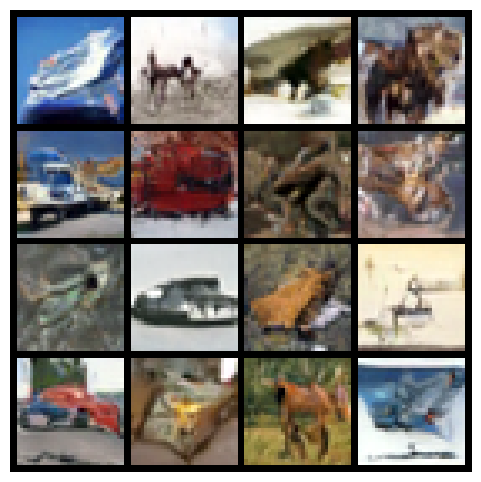

In [5]:
# Load a checkpoint and generate samples (example)
ckpt_path = './runs_ddim_test_edm_preconditioning/checkpoint_epoch_100.pt'  # adjust to your path
if Path(ckpt_path).exists():
    ckpt = torch.load(ckpt_path, map_location=device)
    state_dict = ckpt['model_state']

    new_state_dict = {}
    for k, v in state_dict.items():
        if k.startswith('_orig_mod.'):
            new_state_dict[k.replace('_orig_mod.', '')] = v
        else:
            new_state_dict[k] = v
    model = EDMPrecond(model).to(device)
    model.load_state_dict(new_state_dict)
    model.to(device).eval()
    latents = torch.randn((16, 3, 32, 32), device=device)
    samples = edm_sample_loop(model, latents)
    grid = (samples.clamp(-1,1) + 1) / 2.0
    utils.save_image(grid, 'sample_from_ckpt.png', nrow=4)
    show_image('sample_from_ckpt.png')
else:
    print('No checkpoint found at', ckpt_path)


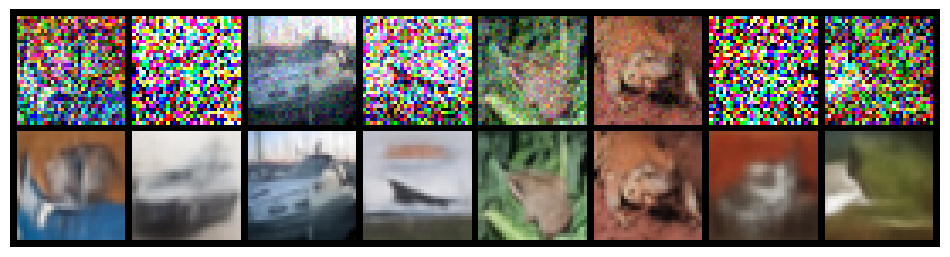

In [6]:
# Short diagnostic: take a test batch, add noise at random sigma, and visualize noisy vs. denoised
loader = test_loader
x, _ = next(iter(loader))
x = x[:8].to(device)

# 1. Sample continuous noise levels (sigma)
# Using log-normal distribution parameters from the paper (P_mean=-1.2, P_std=1.2)
rnd_normal = torch.randn((x.shape[0], 1, 1, 1), device=device)
sigma = (rnd_normal * 1.2 - 1.2).exp()

# 2. Add noise
# EDM uses x + sigma * noise, unlike DDPM's variance preserving schedule
noise = torch.randn_like(x)
x_noisy = x + sigma * noise

with torch.no_grad():
    # 3. Model prediction
    # The EDMPrecond wrapper outputs D_theta(x; sigma), which IS the predicted clean image (x0).
    # No manual formula required.
    x0_pred = model(x_noisy, sigma.flatten())
    x0_pred = x0_pred.clamp(-1, 1)

# show noisy and denoised pairs
# Note: We clamp x_noisy for visualization because sigma can be > 1, 
# pushing pixel values well outside standard image ranges.
pairs = torch.cat([x_noisy[:8].clamp(-1, 1), x0_pred[:8]], dim=0)
grid = (pairs + 1) / 2.0
utils.save_image(grid, 'diagnostic_pairs.png', nrow=8)
show_image('diagnostic_pairs.png', figsize=(12,4))